In [24]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from pathlib import Path

DATA = Path("../data")
RESULTS = Path("../results/q2")
RESULTS.mkdir(parents=True, exist_ok=True)

# Given: true label is y = 1
y_true = 1.0

# Predictions grid to evaluate
yhat_vals = np.array([0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4,
                      0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

In [25]:
def mse_1sample(y, yhat):
    # single-sample MSE
    return (y - yhat)**2


def bce_1sample(y, yhat, eps=1e-12):
    # binary cross-entropy (negative log-likelihood for Bernoulli)
    yhat = np.clip(yhat, eps, 1 - eps)
    return -(y*np.log(yhat) + (1-y)*np.log(1 - yhat))

In [26]:
tbl = pd.DataFrame({
    "True y": [1]*len(yhat_vals),
    "Prediction ŷ": yhat_vals,
    "MSE": [mse_1sample(y_true, v) for v in yhat_vals],
    "BCE": [round(bce_1sample(y_true, v), 6) for v in yhat_vals],
})
tbl

,True y,Prediction ŷ,MSE,BCE
0,1,0.005,0.990025,5.298317
1,1,0.010,0.980100,4.605170
2,1,0.050,0.902500,2.995732
3,1,0.100,0.810000,2.302585
4,1,0.200,0.640000,1.609438
5,1,0.300,0.490000,1.203973
6,1,0.400,0.360000,0.916291
7,1,0.500,0.250000,0.693147
8,1,0.600,0.160000,0.510826
9,1,0.700,0.090000,0.356675


In [27]:
tbl.to_csv(RESULTS/"losses.csv", index=False)
print(f"Saved CSV -> {RESULTS/'losses.csv'}")

Saved CSV -> ../results/q2/losses.csv


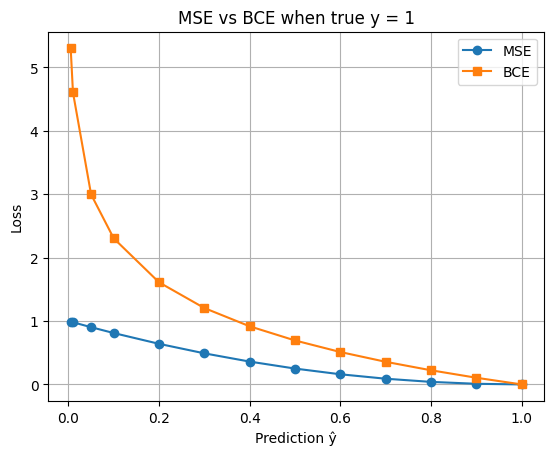

In [28]:
plt.plot(tbl["Prediction ŷ"], tbl["MSE"], marker="o", label="MSE")
plt.plot(tbl["Prediction ŷ"], tbl["BCE"], marker="s", label="BCE")
plt.xlabel("Prediction ŷ")
plt.ylabel("Loss")
plt.title("MSE vs BCE when true y = 1")
plt.grid(True)
# plt.savefig(RESULTS/"mse_vs_bce.png", dpi=150)
plt.legend()
plt.show()

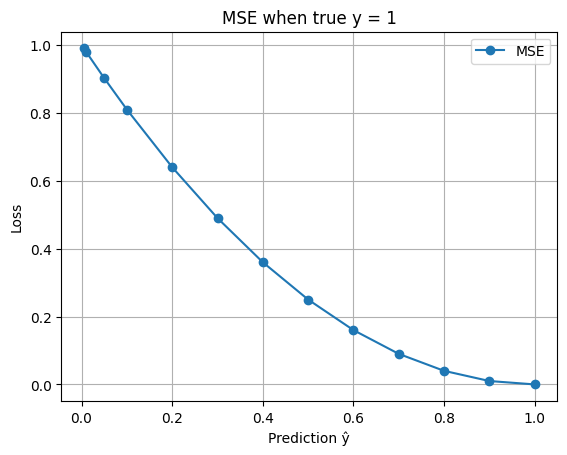

In [29]:
plt.plot(tbl["Prediction ŷ"], tbl["MSE"], marker="o", label="MSE")
plt.xlabel("Prediction ŷ")
plt.ylabel("Loss")
plt.title("MSE when true y = 1")
plt.grid(True)
plt.savefig(RESULTS/"mse_vs_predictions.png", dpi=150)
plt.legend()
plt.show()

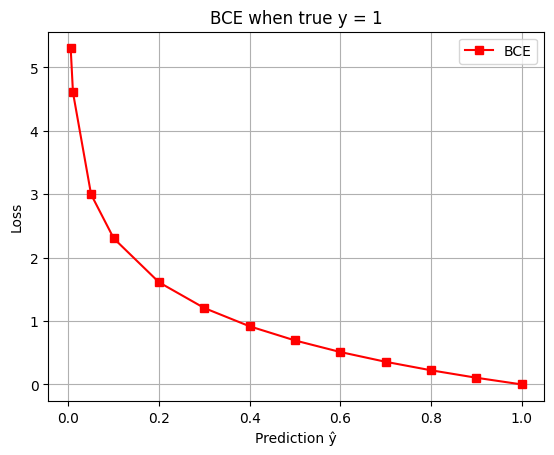

In [30]:
plt.plot(tbl["Prediction ŷ"], tbl["BCE"], marker="s", label="BCE", color="r")
plt.xlabel("Prediction ŷ")
plt.ylabel("Loss")
plt.title("BCE when true y = 1")
plt.grid(True)
plt.savefig(RESULTS/"bce_vs_predictions.png", dpi=150)
plt.legend()
plt.show()